In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset

In [ ]:
df = pd.read_csv(r"Downloads/diabetes_prediction.csv")

## Data Exploration

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Features In The Dataset And Meaning

##### Gender: the male sex or the female sex
##### Age: the length of time that a person has lived or a thing has existed.
##### Hypertension: a condition where the force of blood pushing against the artery walls is consistently too high.
##### Heart_disease: a broad term encompassing various conditions that affect the heart's structure and function.
##### Smoking_History: A smoking history refers to a record of an individual's past and present tobacco use, encompassing details like the start and end dates of smoking, the quantity smoked (often measured in pack-years), and attempts to quit.
##### bmi: BMI stands for Body Mass Index. It's a measure of body fat based on height and weight and is used to categorize an individual's weight as underweight, healthy weight, overweight, or obese.
##### HbA1c_level: HbA1c, also known as glycated hemoglobin or glycosylated hemoglobin, is a blood test that reflects your average blood sugar (glucose) levels over the past 2-3 months. The higher the HbA1c level, the higher your average blood sugar has been. 
##### Diabetes: Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves.

In [9]:
# For better understanding of the columns, I will rename some columns.
df.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'body_mass', 'hemoglobin_level', 'blood_glucose_level', 'diabetes']
df.head()

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df.describe()

,age,hypertension,heart_disease,body_mass,hemoglobin_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Data Cleaning

### Checking for missing data

In [13]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
body_mass              0
hemoglobin_level       0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

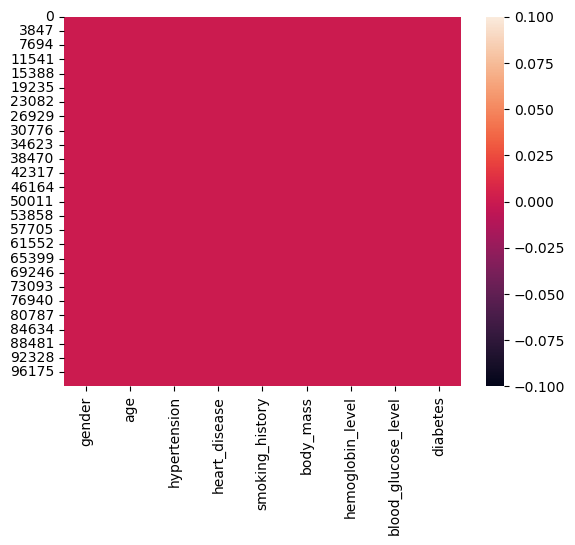

In [14]:
sns.heatmap(df.isnull())

## Checking For Dupliacte Values

In [16]:
df.duplicated().sum()

3854

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   body_mass            96146 non-null  float64
 6   hemoglobin_level     96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [19]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [20]:
df.describe()

,age,hypertension,heart_disease,body_mass,hemoglobin_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


## Exploratory Data Analysis

### Univariate Analysis

#### Distribution of the target feature

<Axes: xlabel='diabetes', ylabel='count'>

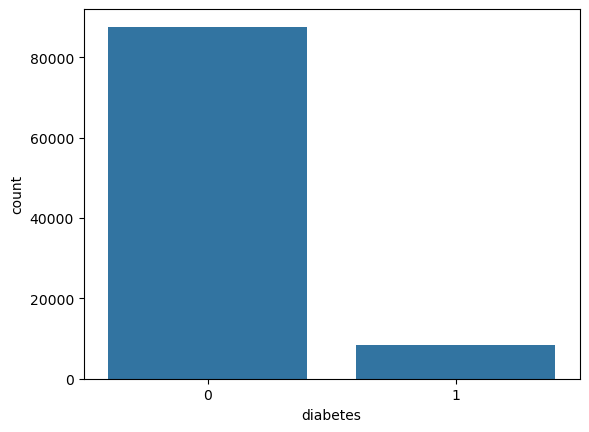

In [24]:
sns.countplot(x=df["diabetes"])

### Data Type Conversion

In [26]:
df['gender'] = df['gender'].astype('category')
df['smoking_history'] = df['smoking_history'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96146 non-null  category
 1   age                  96146 non-null  float64 
 2   hypertension         96146 non-null  int64   
 3   heart_disease        96146 non-null  int64   
 4   smoking_history      96146 non-null  category
 5   body_mass            96146 non-null  float64 
 6   hemoglobin_level     96146 non-null  float64 
 7   blood_glucose_level  96146 non-null  int64   
 8   diabetes             96146 non-null  int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 6.1 MB


## Data Splitting - Independent and Dependent Features

In [29]:
label = df["diabetes"] # target feature

In [30]:
features = df.drop("diabetes", axis=1) # Independent features

In [31]:
df.drop("diabetes", axis=1)

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


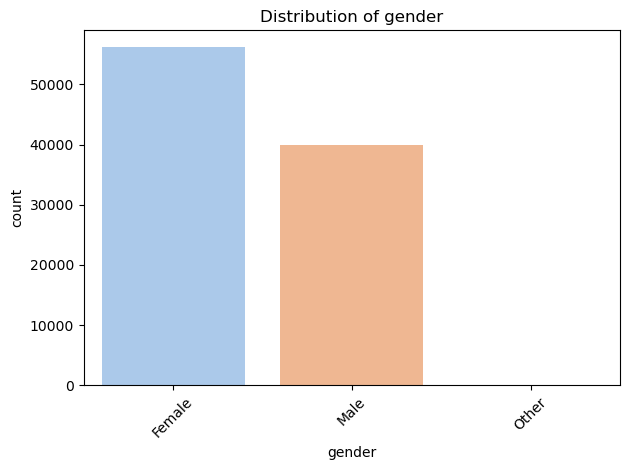

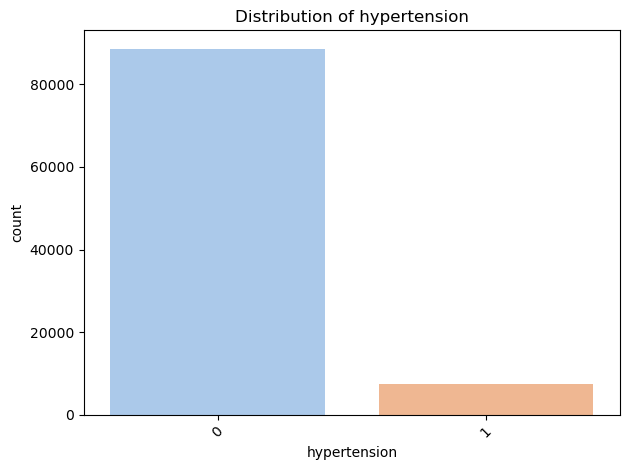

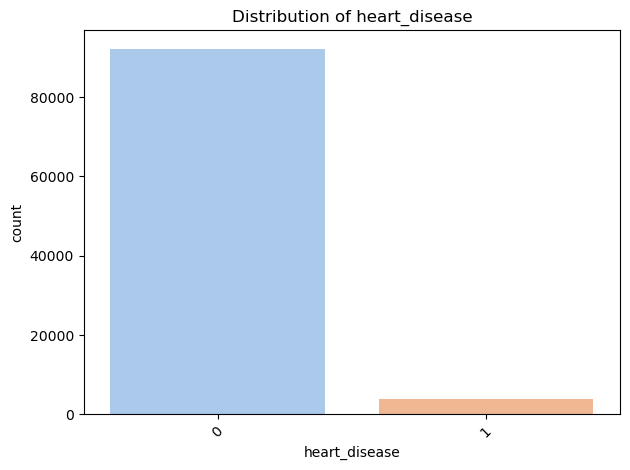

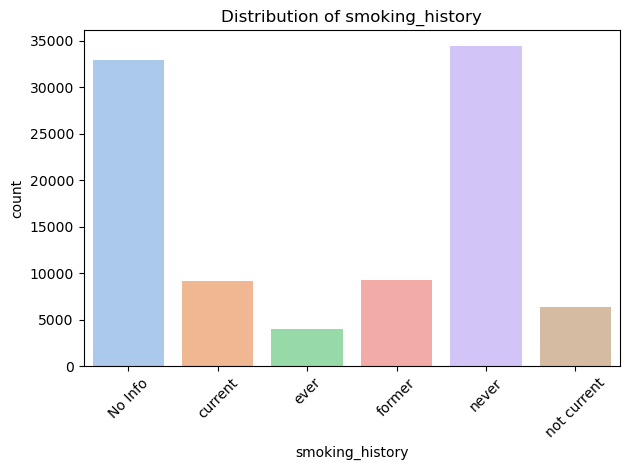

In [32]:
independent_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for col in independent_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue=col, palette="pastel", legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Bivariate Analysis

In [34]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


### Visualize the relationship between target and key features

In [36]:
# Group age into bins
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [37]:
# Display the first few rows to verify
print(df[['age', 'age_group']].head())

    age age_group
0  80.0       76+
1  54.0     46-60
2  28.0     19-30
3  36.0     31-45
4  76.0       76+


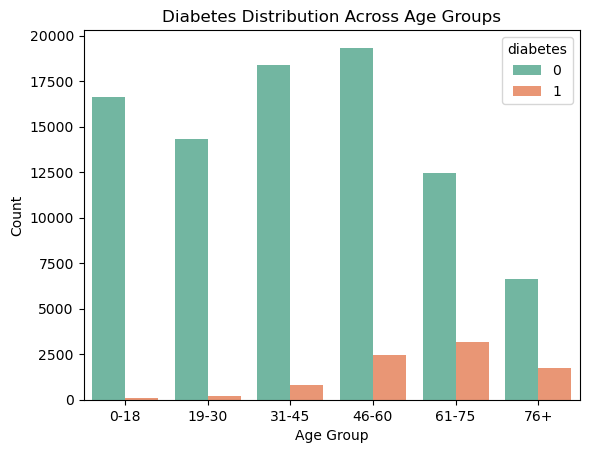

In [38]:
# Age Vs Diabetes
plt.figure()
sns.countplot(data=df, x='age_group', hue='diabetes', palette='Set2')
plt.title('Diabetes Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

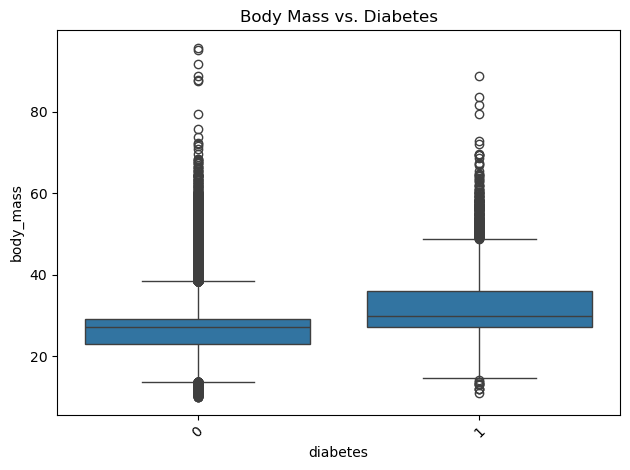

In [39]:
# Body Mass vs. Diabetes
plt.figure()
sns.boxplot(data=df, x='diabetes', y='body_mass')

plt.title("Body Mass vs. Diabetes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

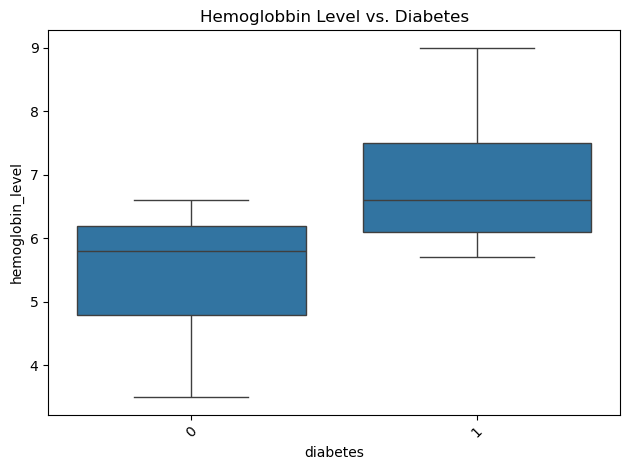

In [40]:
# Hemoglobin Level vs. Diabetes
plt.figure()
sns.boxplot(data=df, x='diabetes', y='hemoglobin_level')

plt.title("Hemoglobbin Level vs. Diabetes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

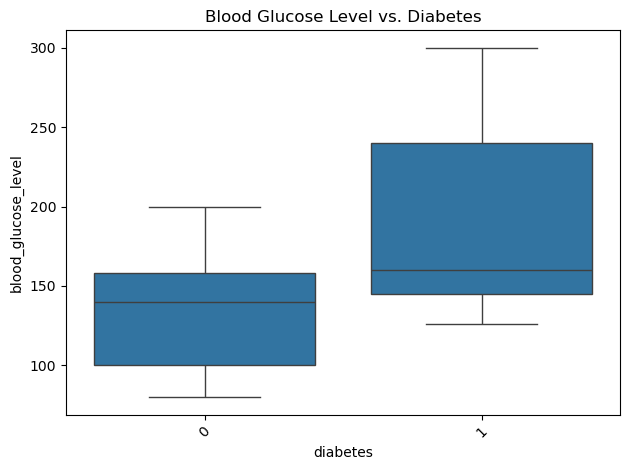

In [41]:
# Blood Glucose Level vs. Diabetes
plt.figure()
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')

plt.title("Blood Glucose Level vs. Diabetes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,76+
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,46-60


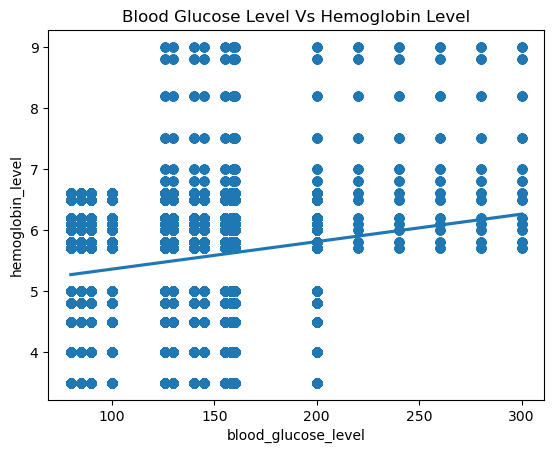

In [43]:
# Blood Glucose Level Vs Hemoglobin Level
sns.regplot(x='blood_glucose_level', y='hemoglobin_level', data=df)
plt.title("Blood Glucose Level Vs Hemoglobin Level")
plt.show()

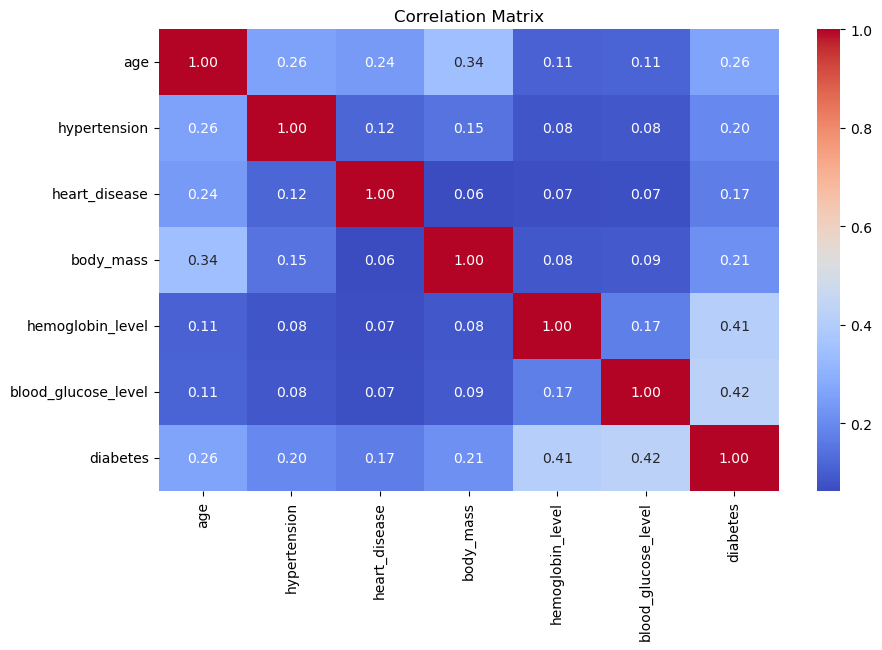

In [44]:
# b) Correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96146 non-null  category
 1   age                  96146 non-null  float64 
 2   hypertension         96146 non-null  int64   
 3   heart_disease        96146 non-null  int64   
 4   smoking_history      96146 non-null  category
 5   body_mass            96146 non-null  float64 
 6   hemoglobin_level     96146 non-null  float64 
 7   blood_glucose_level  96146 non-null  int64   
 8   diabetes             96146 non-null  int64   
 9   age_group            96146 non-null  category
dtypes: category(3), float64(3), int64(4)
memory usage: 6.1 MB


In [46]:
df.drop('age_group', axis=1)

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Data splitting - independent and dependent features

In [48]:
label = df["diabetes"] # target feature

In [49]:
features = df.drop("diabetes", axis=1) # Independent features

In [50]:
df.drop('diabetes', axis=1)

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,76+
1,Female,54.0,0,0,No Info,27.32,6.6,80,46-60
2,Male,28.0,0,0,never,27.32,5.7,158,19-30
3,Female,36.0,0,0,current,23.45,5.0,155,31-45
4,Male,76.0,1,1,current,20.14,4.8,155,76+
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,31-45
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0-18
99997,Male,66.0,0,0,former,27.83,5.7,155,61-75
99998,Female,24.0,0,0,never,35.42,4.0,100,19-30


In [51]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,76+
1,Female,54.0,0,0,No Info,27.32,6.6,80,46-60
2,Male,28.0,0,0,never,27.32,5.7,158,19-30
3,Female,36.0,0,0,current,23.45,5.0,155,31-45
4,Male,76.0,1,1,current,20.14,4.8,155,76+


### Encoding categorical variables¶
#### Using Label Encoding

In [53]:
categorical_data = df.select_dtypes(include=['category'])

In [54]:
categorical_data.head()

,gender,smoking_history,age_group
0,Female,never,76+
1,Female,No Info,46-60
2,Male,never,19-30
3,Female,current,31-45
4,Male,current,76+


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
# Creating an instance of the encoder
encoder = LabelEncoder()

In [57]:
encoder.fit(df["gender"])

LabelEncoder()

In [58]:
encoder.transform(df["gender"])[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [59]:
encoder.fit_transform(df["smoking_history"])[:5]

array([4, 0, 4, 1, 1])

In [60]:
df["smoking_history"].head(5)

0      never
1    No Info
2      never
3    current
4    current
Name: smoking_history, dtype: category
Categories (6, object): ['No Info', 'current', 'ever', 'former', 'never', 'not current']

In [61]:
encoder.fit_transform(df["age_group"])[:5]

array([5, 3, 1, 2, 5])

In [62]:
df["age_group"].head(5)

0      76+
1    46-60
2    19-30
3    31-45
4      76+
Name: age_group, dtype: category
Categories (6, object): ['0-18' < '19-30' < '31-45' < '46-60' < '61-75' < '76+']

In [63]:
features.head(2)

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,76+
1,Female,54.0,0,0,No Info,27.32,6.6,80,46-60


In [64]:
for column_name in categorical_data:
    features[column_name] = encoder.fit_transform(df[column_name])

In [65]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,age_group
0,0,80.0,0,1,4,25.19,6.6,140,5
1,0,54.0,0,0,0,27.32,6.6,80,3
2,1,28.0,0,0,4,27.32,5.7,158,1
3,0,36.0,0,0,1,23.45,5.0,155,2
4,1,76.0,1,1,1,20.14,4.8,155,5


## Supervised Machine Learning

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [69]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,body_mass,hemoglobin_level,blood_glucose_level,age_group
46612,0,35.0,0,0,0,31.53,6.6,155,2
31612,0,0.4,0,0,0,15.19,4.0,130,0
96143,0,60.0,0,0,2,20.90,6.5,100,4
95691,1,66.0,0,0,4,27.05,6.0,130,4
37658,1,48.0,0,0,5,24.05,4.8,145,3


In [70]:
len(X_train) == len(y_train)

True

### Train the model

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
# Initializing the model
model = LogisticRegression(random_state=42)

In [74]:
# Training the model
model.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [75]:
# Make predictions
predictions = model.predict(X_test)

In [76]:
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
y_test.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

In [80]:
y_train.value_counts()

diabetes
0    70155
1     6761
Name: count, dtype: int64

In [81]:
y_test.value_counts()

diabetes
0    17509
1     1721
Name: count, dtype: int64

In [82]:
print(report)

              precision    recall  f1-score   support

           0    0.96217   0.98932   0.97556     17509
           1    0.84760   0.60430   0.70556      1721

    accuracy                        0.95486     19230
   macro avg    0.90488   0.79681   0.84056     19230
weighted avg    0.95192   0.95486   0.95139     19230



Text(0.5, 23.52222222222222, 'Actual Value')

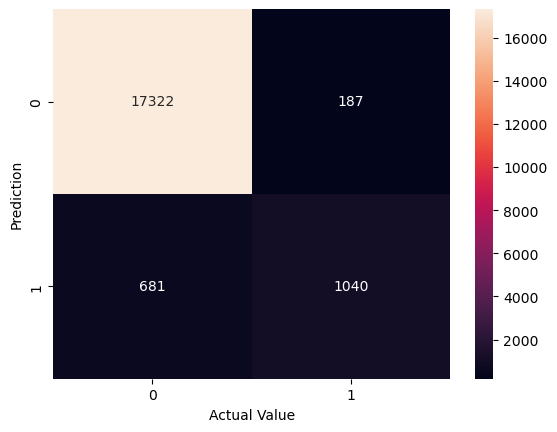

In [83]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

### To increase the accuracy of the analysis, perform another univariate analysis to know how the data is distributed

In [85]:
len(df.select_dtypes(include="number").columns)

7

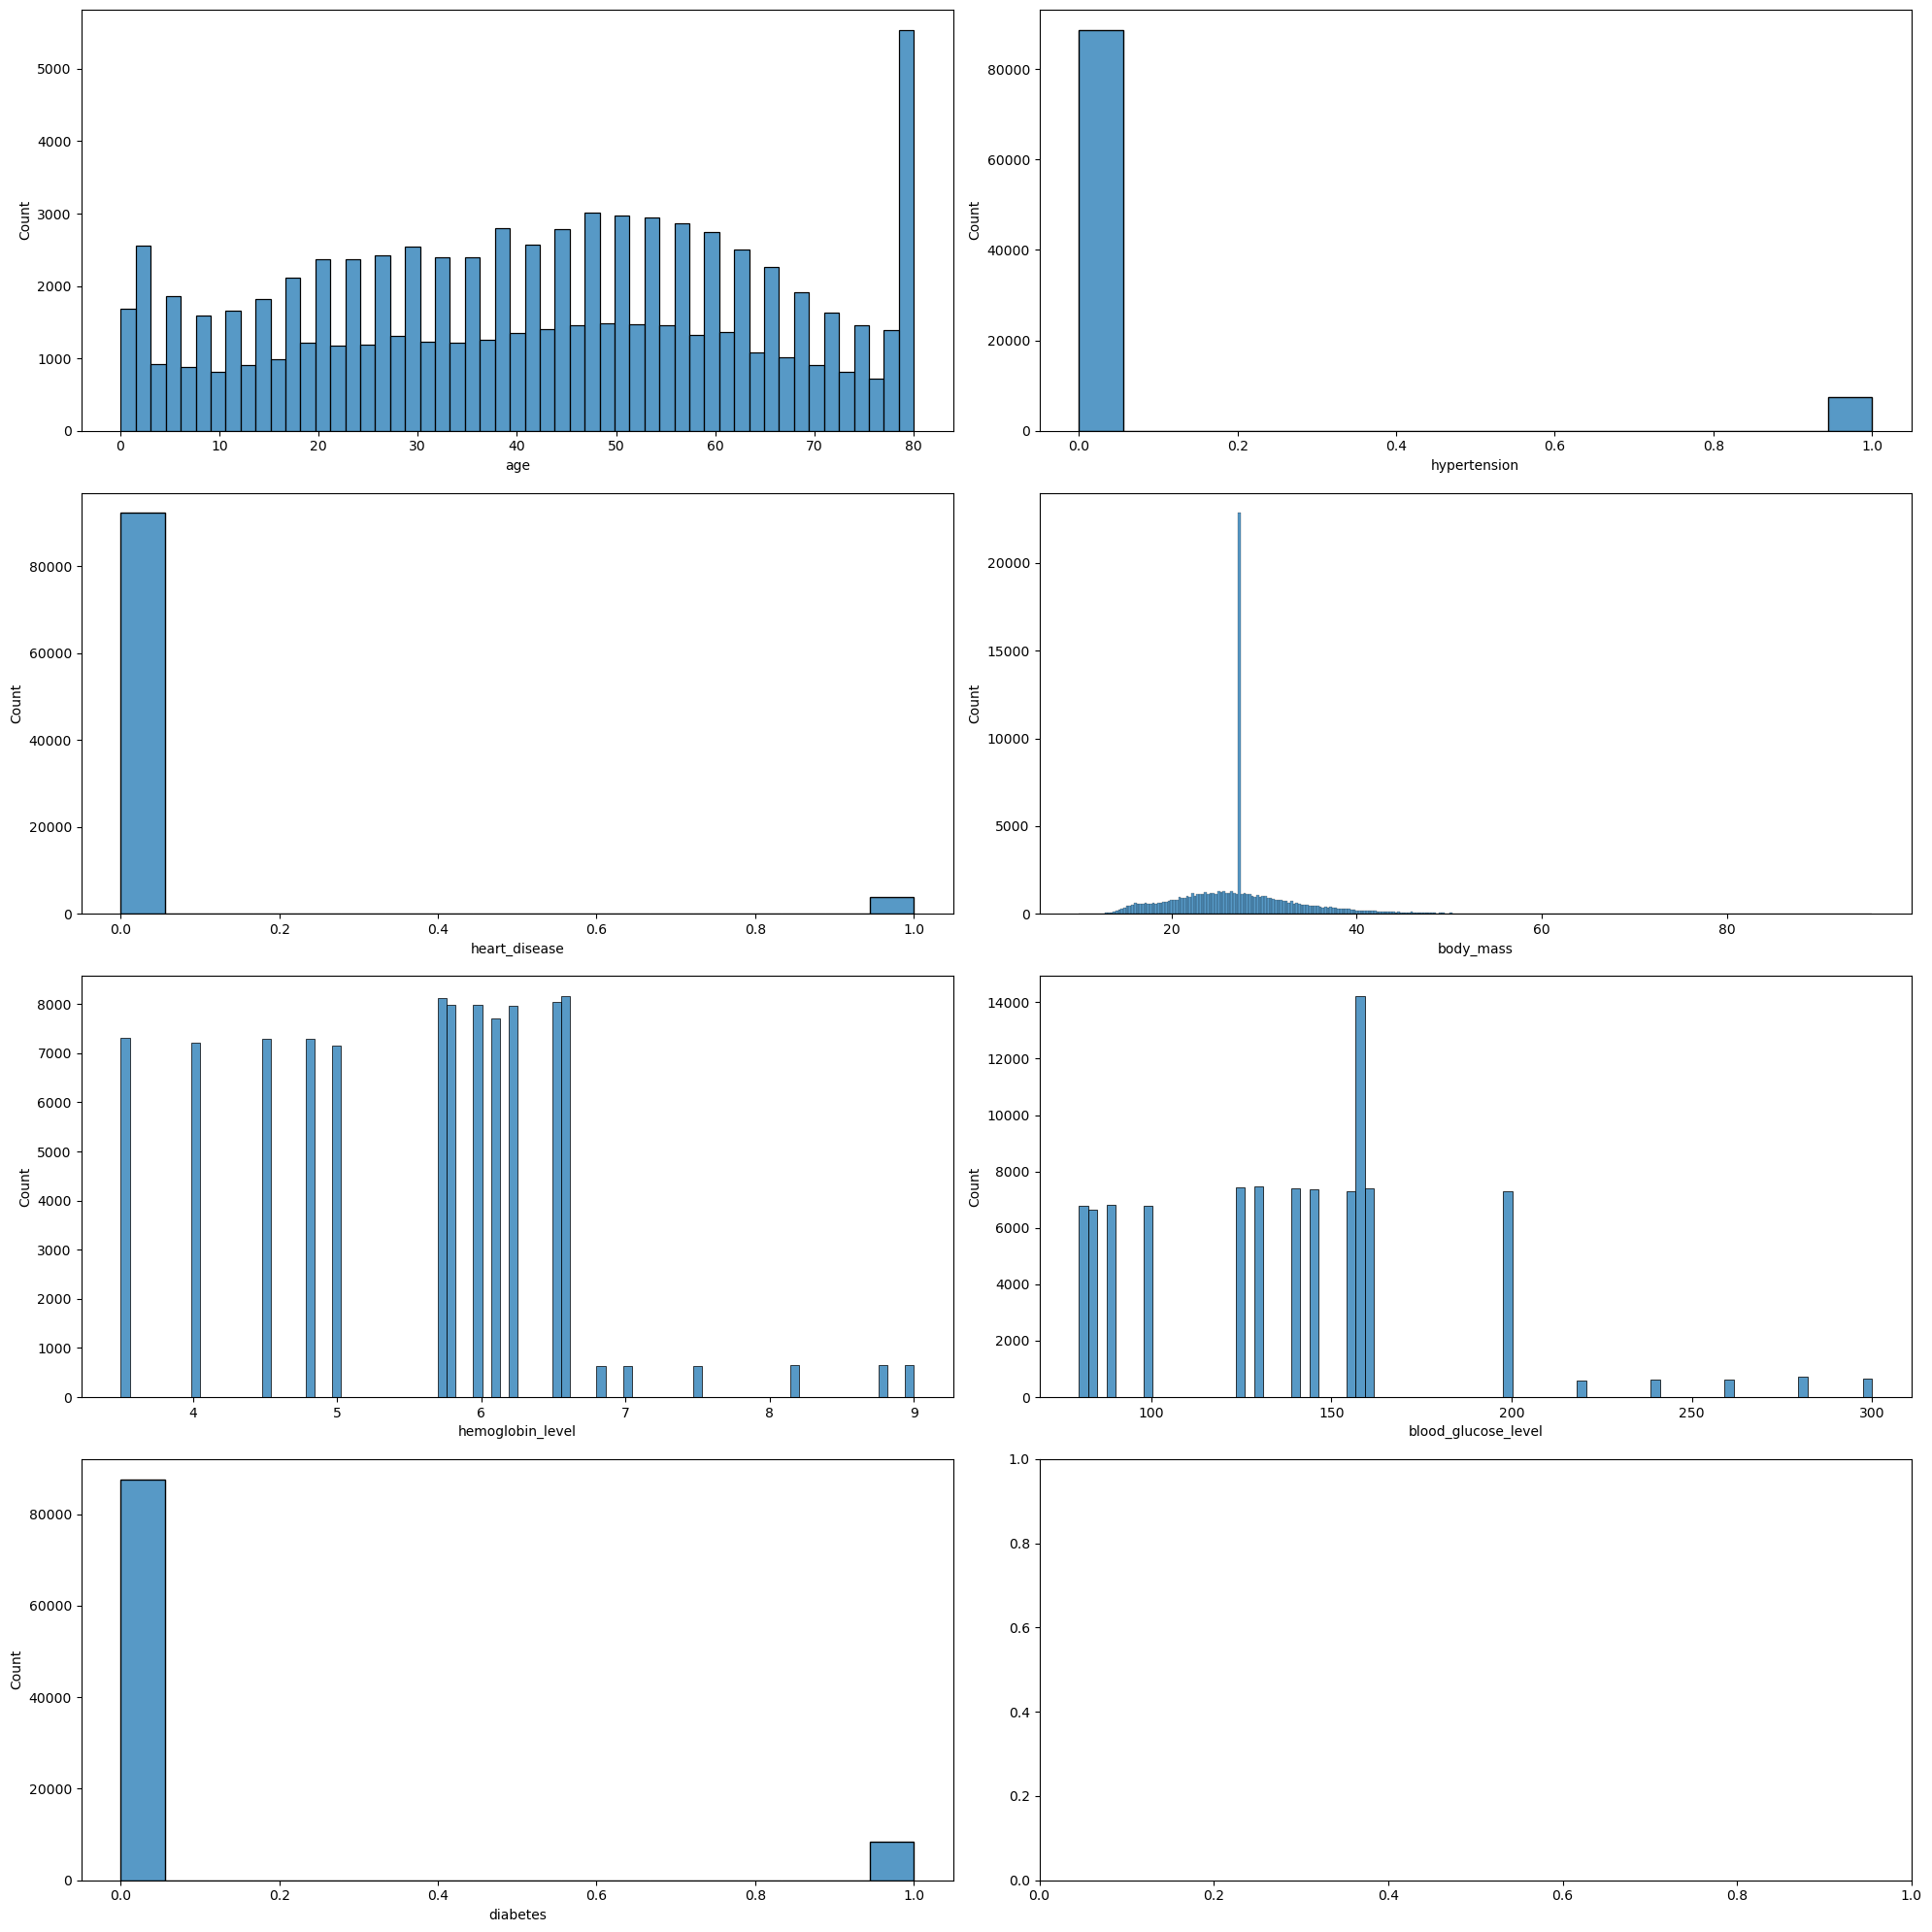

In [86]:
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df.select_dtypes(include="number")):
    sns.histplot(df[column_name], ax=position[index])

plt.tight_layout()
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
# Initialize the scaler
scaler = StandardScaler()

In [89]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0    0.96395   0.98955   0.97658     17509
           1    0.85430   0.62347   0.72086      1721

    accuracy                        0.95679     19230
   macro avg    0.90912   0.80651   0.84872     19230
weighted avg    0.95413   0.95679   0.95369     19230



Text(0.5, 23.52222222222222, 'Actual Value')

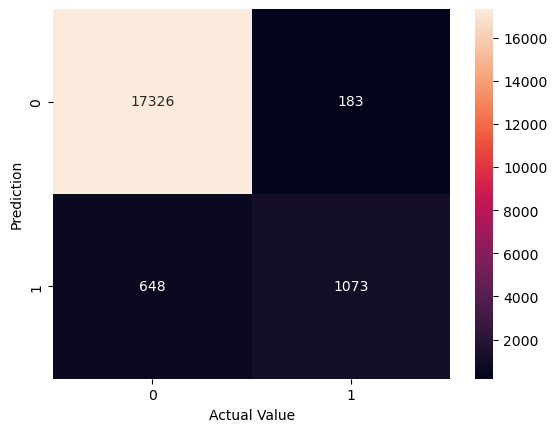

In [90]:
# Initialize the model
model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
# Initialize the scaler
scaler = MinMaxScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0    0.96375   0.99006   0.97673     17509
           1    0.86002   0.62115   0.72132      1721

    accuracy                        0.95705     19230
   macro avg    0.91188   0.80561   0.84903     19230
weighted avg    0.95447   0.95705   0.95387     19230



Text(0.5, 23.52222222222222, 'Actual Value')

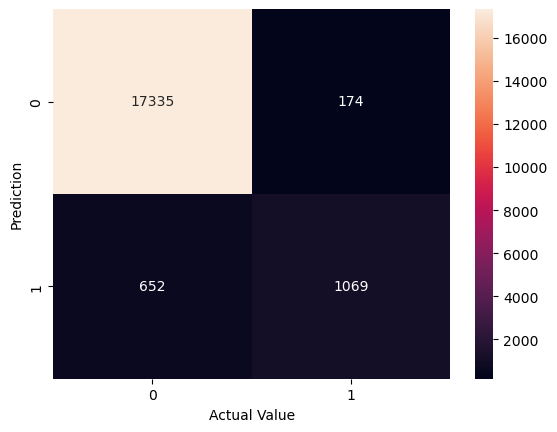

In [94]:
# Initialize the model
model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

### Data Imbalance and class weight

              precision    recall  f1-score   support

           0    0.97674   0.94991   0.96314     17509
           1    0.60173   0.76990   0.67550      1721

    accuracy                        0.93380     19230
   macro avg    0.78923   0.85991   0.81932     19230
weighted avg    0.94318   0.93380   0.93740     19230



Text(0.5, 23.52222222222222, 'Actual Value')

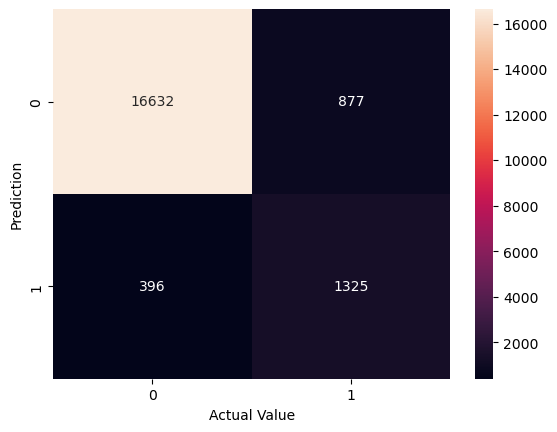

In [96]:
# Initialize the model
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})
# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     17509
           1       0.60      0.77      0.68      1721

    accuracy                           0.93     19230
   macro avg       0.79      0.86      0.82     19230
weighted avg       0.94      0.93      0.94     19230



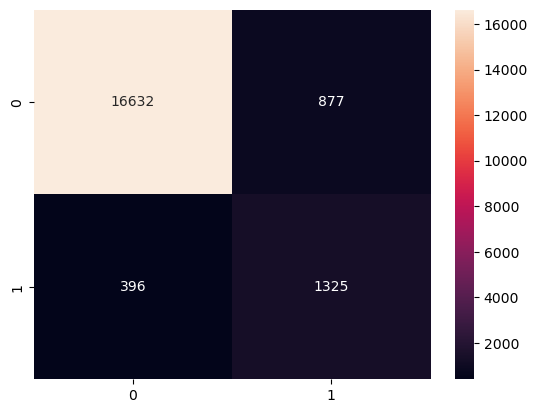

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     17509
           1       0.65      0.75      0.70      1721

    accuracy                           0.94     19230
   macro avg       0.81      0.85      0.83     19230
weighted avg       0.95      0.94      0.94     19230



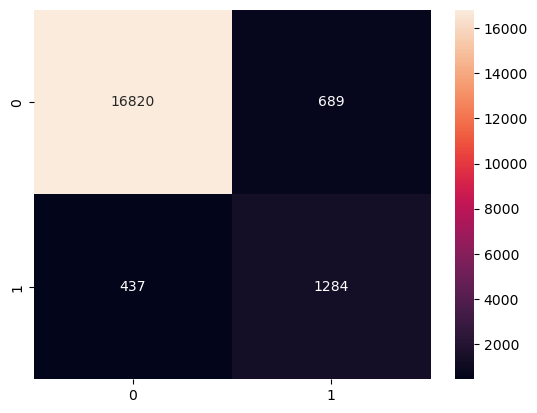

<-- k-Nearest Neighbors -->
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.88      0.61      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.80      0.85     19230
weighted avg       0.96      0.96      0.95     19230



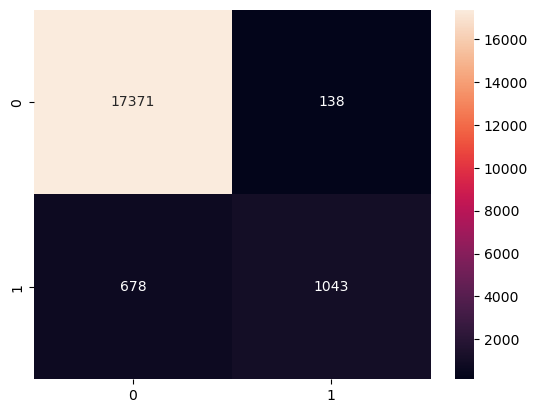

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.72      0.74      0.73      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



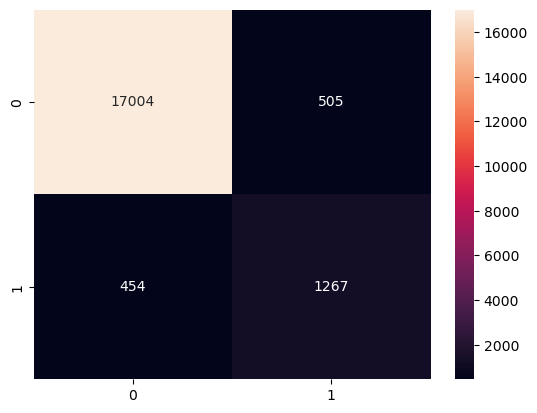

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.94      0.68      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



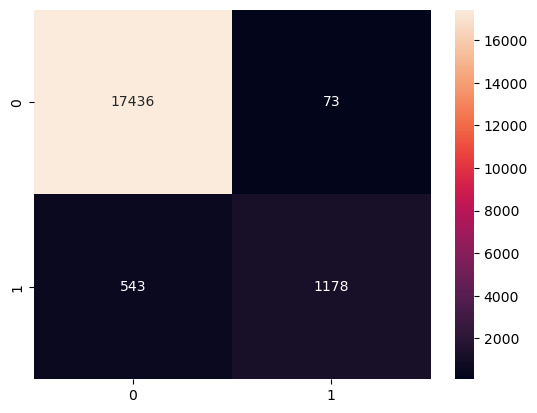

<-- Gradient Boosting -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.99      0.69      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



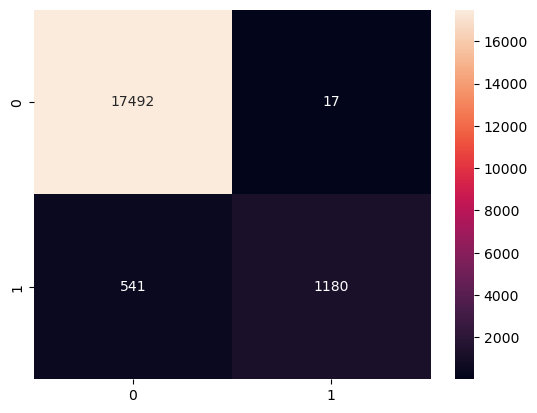

<-- AdaBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



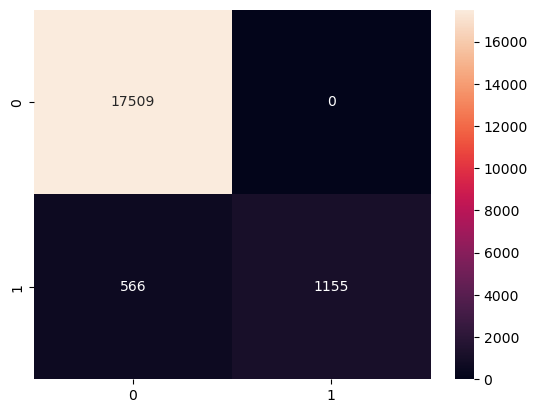

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.96      0.70      0.81      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



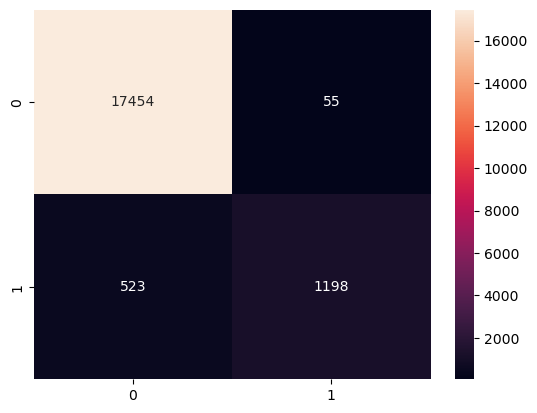

In [97]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier

class_weights = {0: 1, 1: 4}

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

### Balance out the data by over sampling the minority class

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [101]:
# Initialize the scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(features)

In [102]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [103]:
y_resampled.value_counts()

diabetes
0    87664
1    87664
Name: count, dtype: int64

In [104]:
y_resampled.value_counts(normalize=True)*100

diabetes
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='diabetes', ylabel='count'>

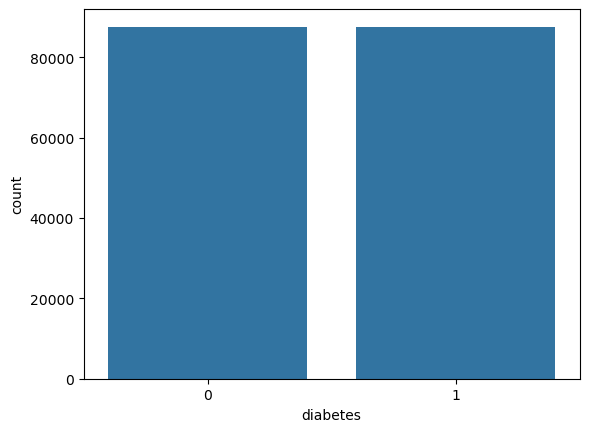

In [105]:
sns.countplot(x=y_resampled)

In [106]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [107]:
from datetime import datetime

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     17439
           1       0.89      0.88      0.88     17627

    accuracy                           0.88     35066
   macro avg       0.88      0.88      0.88     35066
weighted avg       0.88      0.88      0.88     35066



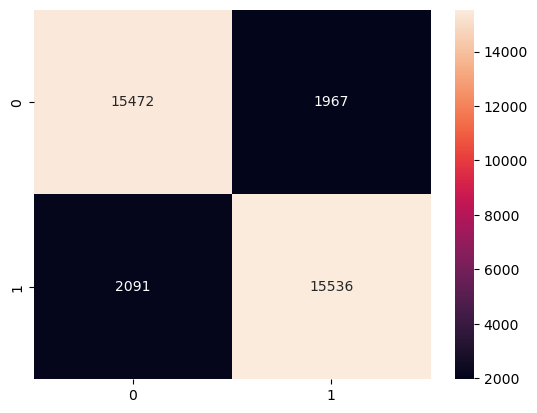

===============Took: 1 seconds to train===============
===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     17439
           1       0.90      0.86      0.88     17627

    accuracy                           0.88     35066
   macro avg       0.88      0.88      0.88     35066
weighted avg       0.88      0.88      0.88     35066



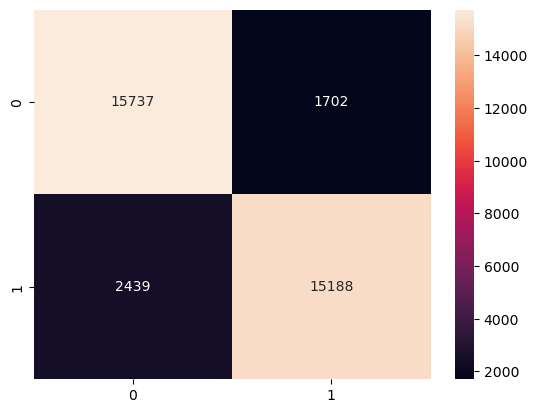

===============Took: 1 seconds to train===============
===============k-Nearest Neighbors===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95     17439
           1       0.92      0.98      0.95     17627

    accuracy                           0.95     35066
   macro avg       0.95      0.95      0.95     35066
weighted avg       0.95      0.95      0.95     35066



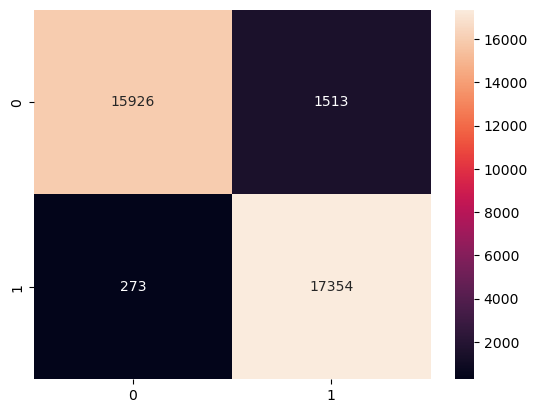

===============Took: 38 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     17439
           1       0.96      0.97      0.96     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



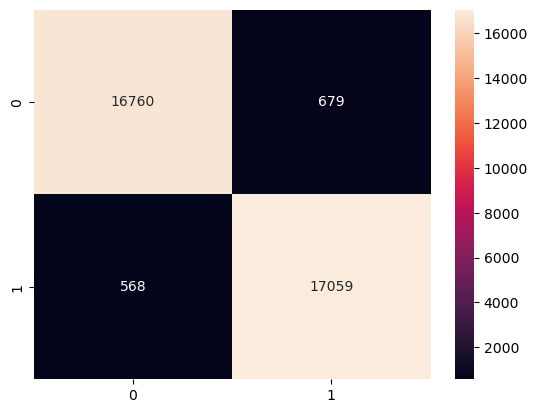

===============Took: 2 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17439
           1       0.98      0.98      0.98     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



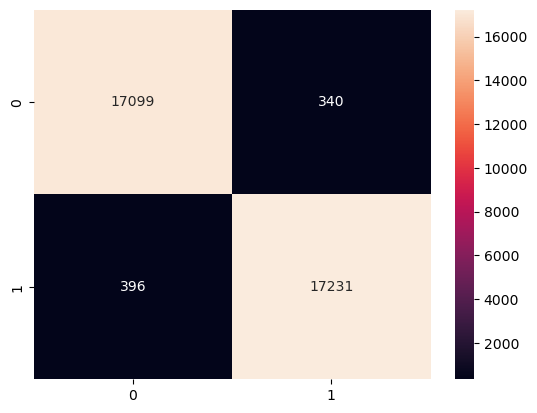

===============Took: 51 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     17439
           1       0.97      0.95      0.96     17627

    accuracy                           0.96     35066
   macro avg       0.96      0.96      0.96     35066
weighted avg       0.96      0.96      0.96     35066



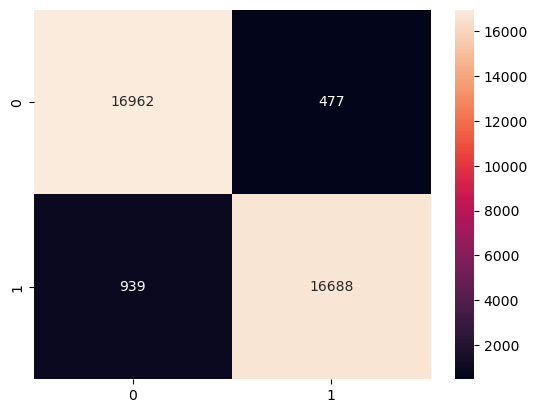

===============Took: 71 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     17439
           1       0.91      0.92      0.91     17627

    accuracy                           0.91     35066
   macro avg       0.91      0.91      0.91     35066
weighted avg       0.91      0.91      0.91     35066



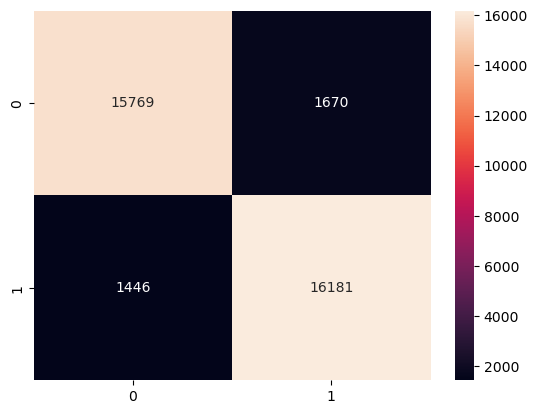

===============Took: 20 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17439
           1       0.99      0.96      0.97     17627

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066



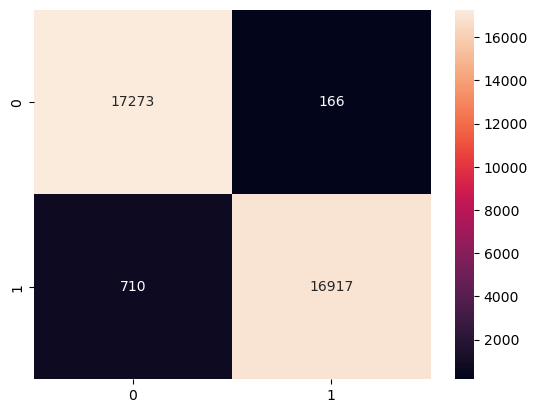

===============Took: 3 seconds to train===============


In [108]:
class_weights = "balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

In [109]:
classifiers

[[LogisticRegression(class_weight='balanced', random_state=42),
  'Logistic Regression'],
 [SGDClassifier(class_weight='balanced', random_state=42), 'SGD Classifiers'],
 [KNeighborsClassifier(), 'k-Nearest Neighbors'],
 [DecisionTreeClassifier(class_weight='balanced', random_state=42),
  'Decision Tree'],
 [RandomForestClassifier(class_weight='balanced', random_state=42),
  'Random Forest'],
 [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
 [AdaBoostClassifier(algorithm='SAMME', random_state=42), 'AdaBoost'],
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='mlogloss',
                feature_types=None, feature_weights=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, m

In [ ]:
[RandomForestClassifier(class_weight='balanced', random_state=42),
 'Random Forest']

In [ ]:
classifiers[4][0].feature_importances

In [ ]:
features.head(2)

In [113]:
# Feature importance for Random Forest
importances = classifiers[4][0].feature_importances_
importances

array([0.00702557, 0.14997191, 0.0133588 , 0.00492659, 0.02043538,
       0.0902705 , 0.37649126, 0.29101117, 0.04650882])

In [114]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.007026
1,age,0.149972
2,hypertension,0.013359
3,heart_disease,0.004927
4,smoking_history,0.020435
5,body_mass,0.090270
6,hemoglobin_level,0.376491
7,blood_glucose_level,0.291011
8,age_group,0.046509


In [115]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,hemoglobin_level,0.376491
7,blood_glucose_level,0.291011
1,age,0.149972
5,body_mass,0.090270
8,age_group,0.046509
4,smoking_history,0.020435
2,hypertension,0.013359
0,gender,0.007026
3,heart_disease,0.004927


<Axes: xlabel='Importance', ylabel='Feature'>

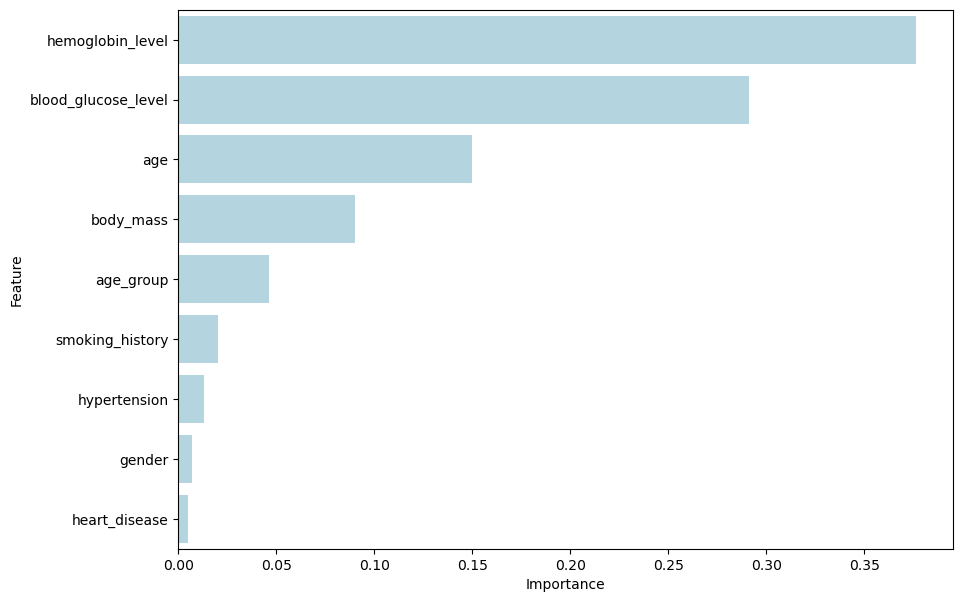

In [116]:
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='lightblue')

<Axes: >

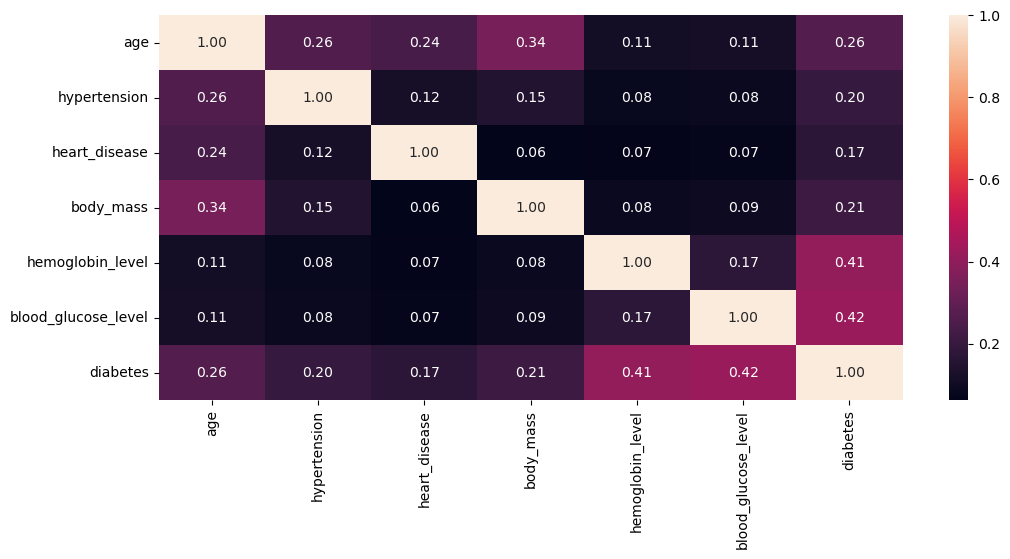

In [117]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"]
}

In [120]:
grid_search = GridSearchCV(estimator=classifiers[4][0], param_grid=parameter_grid, cv=5, scoring="recall")

### Save the model

In [122]:
!pip install joblib
import joblib

In [135]:
from joblib import dump

joblib.dump(model, 'Diabetes_prediction.joblib')

['Diabetes_prediction.joblib']

In [133]:
# model = LogisticRegression(max_iter=200)
# model.fit(X, y)


In [125]:
model = XGBClassifier().fit(X_train, y_train)

dump(model, 'Diabetes_prediction.joblib')

['Diabetes_prediction.joblib']

In [131]:
# Save the model
# joblib.dump(model_pipeline, "xgb_diabetes_model.joblib")

# print("Model training complete and saved as 'xgb_diabetes_model.joblib'.")